In [ ]:
import numpy as np
import matplotlib.pyplot  as plt
from PIL import Image

!pip install scipy
!pip install opencv-python


In [ ]:
#trying out  svd
from scipy.linalg  import svd
X =  np.array([[2,3,4],[1,7,9],[9,5,4]])
X

array([[2, 3, 4],
       [1, 7, 9],
       [9, 5, 4]])

In [67]:
U,sigma,V_T  = svd(X)
print(f'U: {U}')
print(f'sigma: {sigma}')
print(f'V_T: {V_T}')

U: [[-0.34834557 -0.08992367 -0.93304292]
 [-0.68738729 -0.65224462  0.31949285]
 [-0.63730219  0.75265576  0.16539414]]
sigma: [15.33200072  6.84240068  0.33362663]
V_T: [[-0.46437502 -0.589829   -0.66064937]
 [ 0.86838088 -0.15670005 -0.47048884]
 [-0.17398418  0.79217854 -0.58496381]]


In [92]:
import cv2
img =  Image.open('1830378-3840x2160-desktop-4k-the-100-tv-series-background-image.jpg').convert('L')


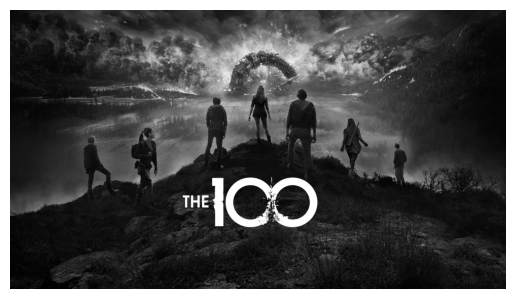

In [118]:
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.show()

In [173]:
img_array  =  np.array(img)
# Define the dimensions
H, W = img_array.shape

# Generate Gaussian noise
n_20= np.random.normal(0, 20, (H, W))

# Add the noise to the image
noise_20 = img_array.astype(np.float32) + n_20

# Clip the values to be in the valid range [0, 255] and convert to uint8
noise_20 = np.clip(noise_20, 0, 255).astype(np.uint8)



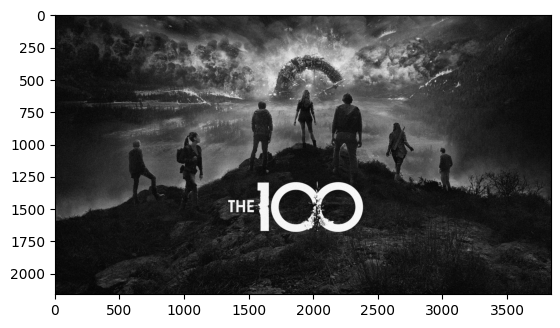

In [174]:
plt.imshow(noise_20,cmap='gray')

In [175]:
U,sigma,V_T = np.linalg.svd(noise_20,full_matrices=False)

In [176]:
k = 50
sigma = sigma[:k]
s_matrix = np.diag(sigma)
U = U[:,:k]
V_T = V_T[:k,:]

denoised_img = np.dot(U,np.dot(s_matrix,V_T))
denoised_img = np.clip(denoised_img,0,255).astype(np.uint8)

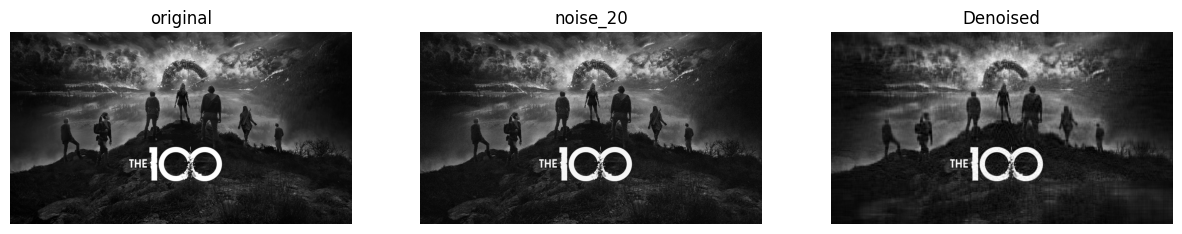

In [177]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.imshow(img,cmap='gray')
plt.title('original')
plt.axis('off')

plt.subplot(132)
plt.imshow(noise_20,cmap='gray')
plt.title('noise_20')
plt.axis('off')

plt.subplot(133)
plt.imshow(denoised_img,cmap='gray')
plt.title('Denoised')
plt.axis('off')

plt.show()